<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1>

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [86]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [87]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [4]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

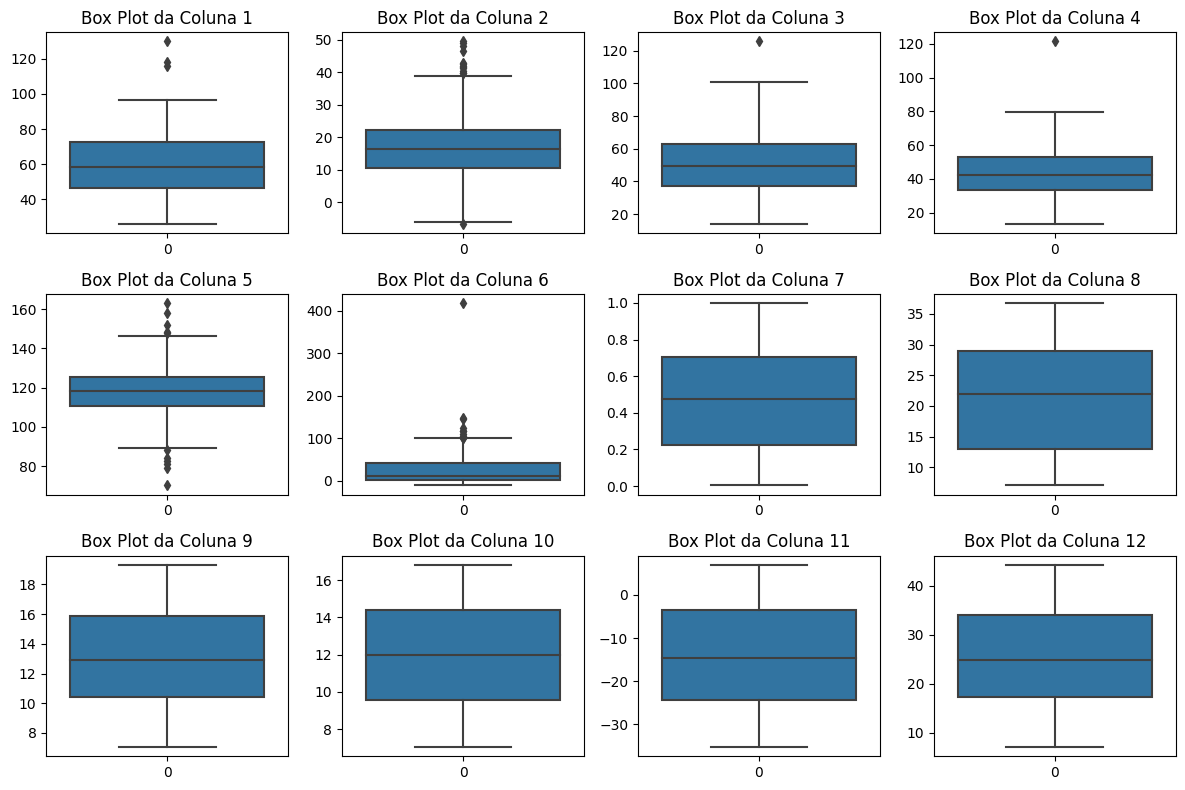

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()


# Primeiro Treino 💪

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [70]:
def evaluateModel(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print()
  print(f"score = {model.score(X_test, y_test):.2f}\n")
  print("classification report:")
  print(classification_report(y_test, y_pred))
  print("confusion matrix:")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.show();

In [130]:
model = MLPClassifier(verbose=True, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [131]:
model.fit(X_train, y_train);

Iteration 1, loss = 8.90976786
Iteration 2, loss = 4.55905334
Iteration 3, loss = 1.49396074
Iteration 4, loss = 1.46011724
Iteration 5, loss = 2.31989753
Iteration 6, loss = 2.63167253
Iteration 7, loss = 2.48320244
Iteration 8, loss = 2.04870491
Iteration 9, loss = 1.49251829
Iteration 10, loss = 1.01699664
Iteration 11, loss = 0.87392569
Iteration 12, loss = 1.04442800
Iteration 13, loss = 1.16006413
Iteration 14, loss = 1.09003848
Iteration 15, loss = 0.92067705
Iteration 16, loss = 0.78034405
Iteration 17, loss = 0.73499009
Iteration 18, loss = 0.76447688
Iteration 19, loss = 0.77127612
Iteration 20, loss = 0.72638316
Iteration 21, loss = 0.66842012
Iteration 22, loss = 0.65333978
Iteration 23, loss = 0.66190321
Iteration 24, loss = 0.66481365
Iteration 25, loss = 0.64448763
Iteration 26, loss = 0.61335813
Iteration 27, loss = 0.59808465
Iteration 28, loss = 0.58965355
Iteration 29, loss = 0.58274383
Iteration 30, loss = 0.56882661
Iteration 31, loss = 0.55921619
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.85      0.87      0.86        38
      Normal       0.76      0.73      0.74        22

    accuracy                           0.82        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

confusion matrix:


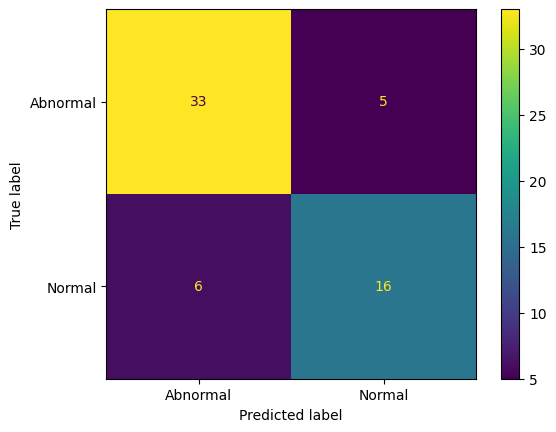

In [132]:
evaluateModel(model, X_test, y_test)

In [28]:
y_train.value_counts()

Abnormal    166
Normal       82
Name: Class_att, dtype: int64

Como é possível perceber pelo <i>classification report</i>, temos uma facilidade maior do modelo em classificar corretamente a classe de <i>'abnormal'</i> (sobretudo olhando a métrica de precisão). De fato, ao observar o a distribuição dos valores no dataset de treino, é possível reparar que temos mais ocorrências dessa classe, do que da classe 'normal'. É necessário, então, fazer o balanceamento das classes no dataset de treino

# Balanceamento de classes no dataset de treino

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [82]:
model = MLPClassifier(verbose=True, max_iter=200, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [83]:
model.fit(X_train_resampled, y_train_resampled)

Iteration 1, loss = 6.29418922
Iteration 2, loss = 3.10098530
Iteration 3, loss = 1.33202863
Iteration 4, loss = 1.94277096
Iteration 5, loss = 2.26424437
Iteration 6, loss = 1.80303848
Iteration 7, loss = 1.17787839
Iteration 8, loss = 0.91316006
Iteration 9, loss = 1.03389748
Iteration 10, loss = 1.15136667
Iteration 11, loss = 1.05265281
Iteration 12, loss = 0.85983267
Iteration 13, loss = 0.74805862
Iteration 14, loss = 0.75476251
Iteration 15, loss = 0.78711218
Iteration 16, loss = 0.78026784
Iteration 17, loss = 0.71191511
Iteration 18, loss = 0.65450035
Iteration 19, loss = 0.63311363
Iteration 20, loss = 0.62603300
Iteration 21, loss = 0.61879913
Iteration 22, loss = 0.59860585
Iteration 23, loss = 0.58157789
Iteration 24, loss = 0.56484227
Iteration 25, loss = 0.56740635
Iteration 26, loss = 0.55817715
Iteration 27, loss = 0.54807715
Iteration 28, loss = 0.53786856
Iteration 29, loss = 0.53440458
Iteration 30, loss = 0.52987725
Iteration 31, loss = 0.52450087
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)


score = 0.83

classification report:
              precision    recall  f1-score   support

    Abnormal       0.89      0.84      0.86        38
      Normal       0.75      0.82      0.78        22

    accuracy                           0.83        60
   macro avg       0.82      0.83      0.82        60
weighted avg       0.84      0.83      0.83        60

confusion matrix:


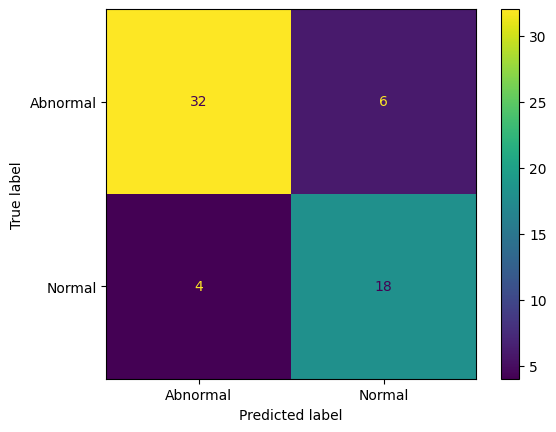

In [84]:
evaluateModel(model, X_test, y_test)

In [88]:
#WIP: removing outliers
from scipy import stats
outliers_removed = df[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
outliers_removed.shape

(298, 13)

In [89]:
y = outliers_removed['Class_att']
X = outliers_removed.drop(['Class_att'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=41)
model = MLPClassifier(verbose=True, max_iter=200, random_state=42)
# smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [91]:
model.fit(X_train, y_train)

Iteration 1, loss = 8.90976786
Iteration 2, loss = 4.55905334
Iteration 3, loss = 1.49396074
Iteration 4, loss = 1.46011724
Iteration 5, loss = 2.31989753
Iteration 6, loss = 2.63167253
Iteration 7, loss = 2.48320244
Iteration 8, loss = 2.04870491
Iteration 9, loss = 1.49251829
Iteration 10, loss = 1.01699664
Iteration 11, loss = 0.87392569
Iteration 12, loss = 1.04442800
Iteration 13, loss = 1.16006413
Iteration 14, loss = 1.09003848
Iteration 15, loss = 0.92067705
Iteration 16, loss = 0.78034405
Iteration 17, loss = 0.73499009
Iteration 18, loss = 0.76447688
Iteration 19, loss = 0.77127612
Iteration 20, loss = 0.72638316
Iteration 21, loss = 0.66842012
Iteration 22, loss = 0.65333978
Iteration 23, loss = 0.66190321
Iteration 24, loss = 0.66481365
Iteration 25, loss = 0.64448763
Iteration 26, loss = 0.61335813
Iteration 27, loss = 0.59808465
Iteration 28, loss = 0.58965355
Iteration 29, loss = 0.58274383
Iteration 30, loss = 0.56882661
Iteration 31, loss = 0.55921619
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42, verbose=True)


score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.85      0.87      0.86        38
      Normal       0.76      0.73      0.74        22

    accuracy                           0.82        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

confusion matrix:


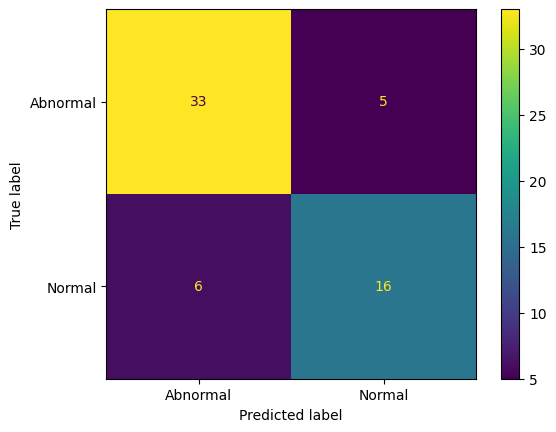

In [92]:
evaluateModel(model, X_test, y_test)

#Mudando as funções de ativação

###tanh -> the hyperbolic tan function, returns f(x) = tanh(x)

In [183]:
model = MLPClassifier(verbose=False, random_state=42, activation='tanh', max_iter=1000)
model.fit(X_train, y_train);


score = 0.88

classification report:
              precision    recall  f1-score   support

    Abnormal       0.90      0.92      0.91        38
      Normal       0.86      0.82      0.84        22

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.88      0.88        60

confusion matrix:


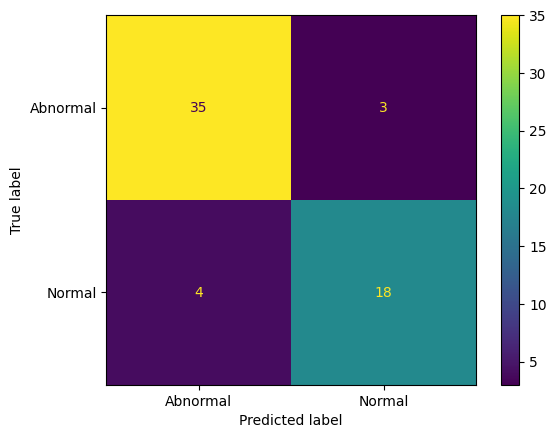

In [184]:
evaluateModel(model, X_test, y_test)

###logistic -> the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

In [181]:
model = MLPClassifier(verbose=False, random_state=42, activation='logistic', max_iter=1000)
model.fit(X_train, y_train);


score = 0.83

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.87      0.87        38
      Normal       0.77      0.77      0.77        22

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60

confusion matrix:


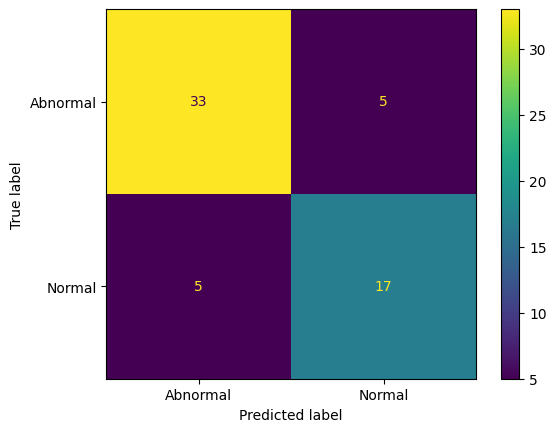

In [182]:
evaluateModel(model, X_test, y_test)

###identity -> no-op activation, useful to implement linear bottleneck, returns f(x) = x

In [179]:
model = MLPClassifier(verbose=False, random_state=42, activation='identity', max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.89      0.89      0.89        38
      Normal       0.82      0.82      0.82        22

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

confusion matrix:


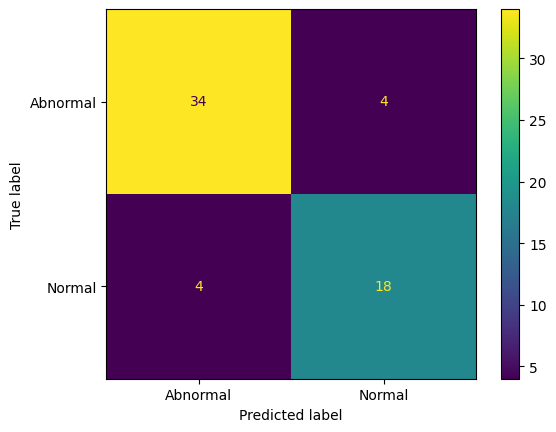

In [180]:
evaluateModel(model, X_test, y_test)

#Trocando os solvers

In [121]:
model = MLPClassifier(verbose=False, random_state=42, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train);


score = 0.75

classification report:
              precision    recall  f1-score   support

    Abnormal       0.78      0.84      0.81        38
      Normal       0.68      0.59      0.63        22

    accuracy                           0.75        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.75      0.75      0.75        60

confusion matrix:


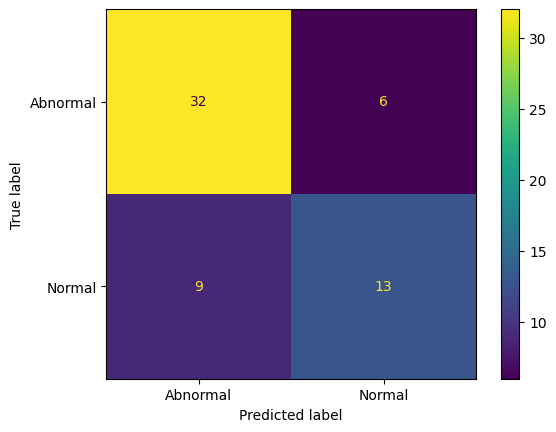

In [122]:
evaluateModel(model, X_test, y_test)

In [123]:
model = MLPClassifier(verbose=False, random_state=42, solver='sgd', max_iter=1000)
model.fit(X_train, y_train);


score = 0.80

classification report:
              precision    recall  f1-score   support

    Abnormal       0.78      0.95      0.86        38
      Normal       0.86      0.55      0.67        22

    accuracy                           0.80        60
   macro avg       0.82      0.75      0.76        60
weighted avg       0.81      0.80      0.79        60

confusion matrix:


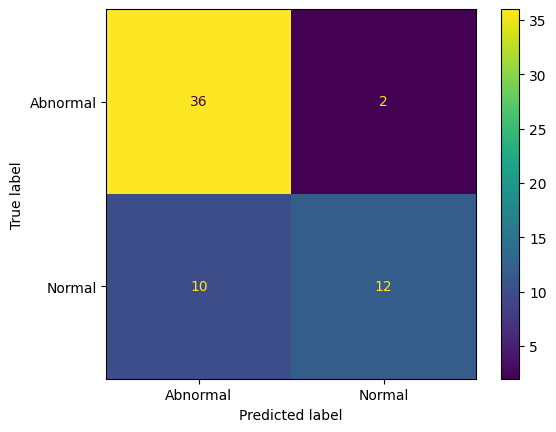

In [124]:
evaluateModel(model, X_test, y_test)

#Trocando learning rate

In [136]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1, max_iter=1000)
model.fit(X_train, y_train);


score = 0.63

classification report:
              precision    recall  f1-score   support

    Abnormal       0.63      1.00      0.78        38
      Normal       0.00      0.00      0.00        22

    accuracy                           0.63        60
   macro avg       0.32      0.50      0.39        60
weighted avg       0.40      0.63      0.49        60

confusion matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


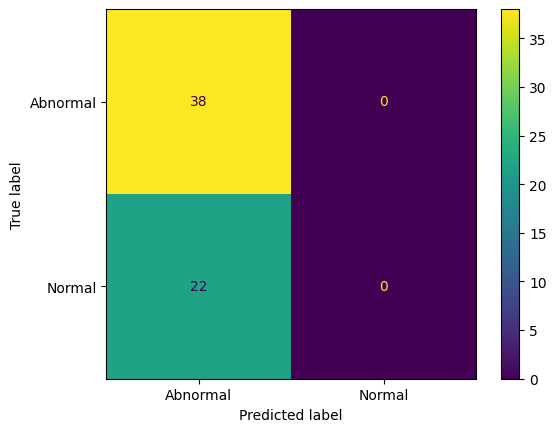

In [137]:
evaluateModel(model, X_test, y_test)

In [139]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1e-2, max_iter=1000)
model.fit(X_train, y_train);


score = 0.80

classification report:
              precision    recall  f1-score   support

    Abnormal       0.82      0.87      0.85        38
      Normal       0.75      0.68      0.71        22

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60

confusion matrix:


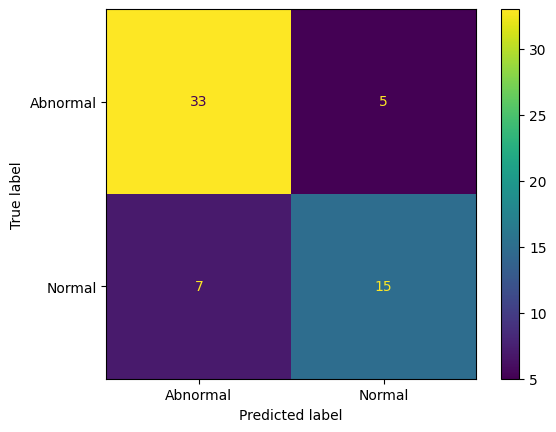

In [140]:
evaluateModel(model, X_test, y_test)

In [141]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1e-4, max_iter=1000)
model.fit(X_train, y_train);


score = 0.78

classification report:
              precision    recall  f1-score   support

    Abnormal       0.86      0.79      0.82        38
      Normal       0.68      0.77      0.72        22

    accuracy                           0.78        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.79      0.78      0.79        60

confusion matrix:


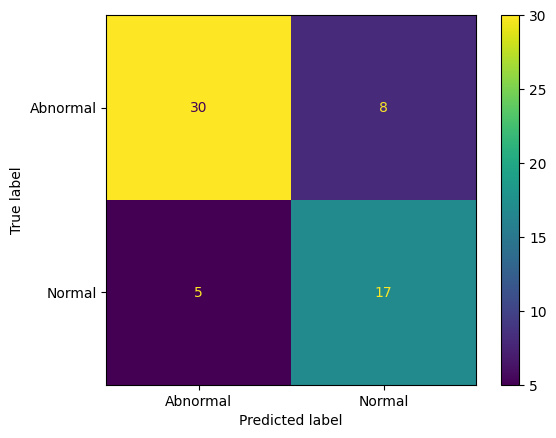

In [142]:
evaluateModel(model, X_test, y_test)

In [143]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1e-6, max_iter=1000)
model.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.38

classification report:
              precision    recall  f1-score   support

    Abnormal       1.00      0.03      0.05        38
      Normal       0.37      1.00      0.54        22

    accuracy                           0.38        60
   macro avg       0.69      0.51      0.30        60
weighted avg       0.77      0.38      0.23        60

confusion matrix:


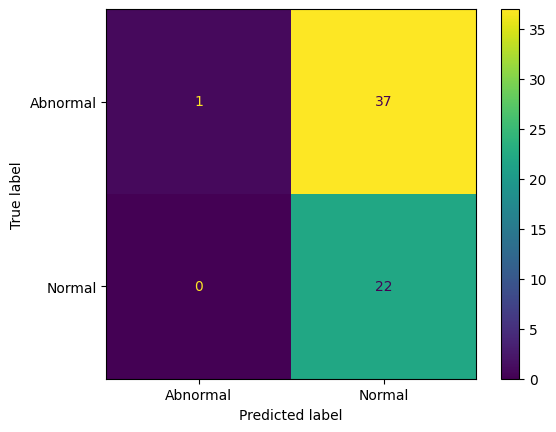

In [144]:
evaluateModel(model, X_test, y_test)

#Mudando hidden layers

In [149]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (100, 100, 100,), max_iter=1000)
model.fit(X_train, y_train);


score = 0.85

classification report:
              precision    recall  f1-score   support

    Abnormal       0.89      0.87      0.88        38
      Normal       0.78      0.82      0.80        22

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60

confusion matrix:


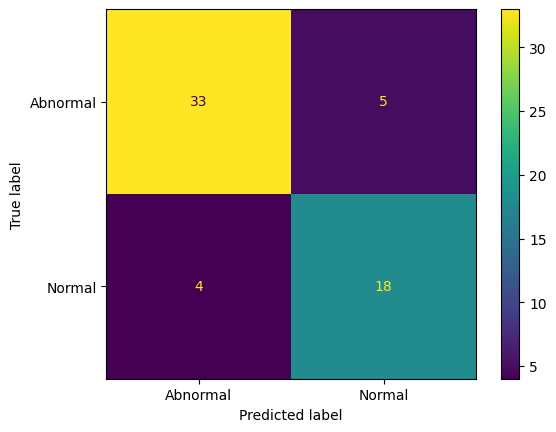

In [150]:
evaluateModel(model, X_test, y_test)

In [151]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (512, 512, 512,), max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.94      0.84      0.89        38
      Normal       0.77      0.91      0.83        22

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60

confusion matrix:


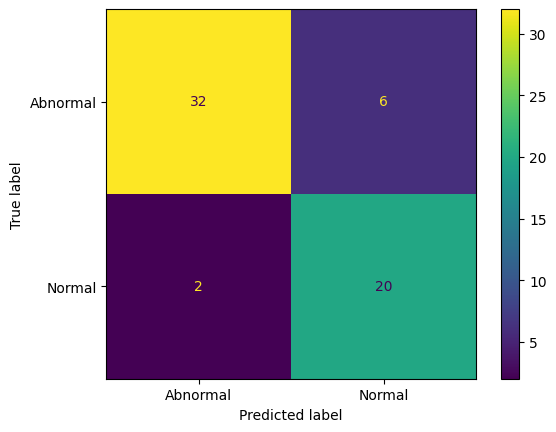

In [152]:
evaluateModel(model, X_test, y_test)

In [170]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (1024, 1024, 1024), max_iter=1000)
model.fit(X_train, y_train);


score = 0.83

classification report:
              precision    recall  f1-score   support

    Abnormal       0.85      0.89      0.87        38
      Normal       0.80      0.73      0.76        22

    accuracy                           0.83        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.83      0.83      0.83        60

confusion matrix:


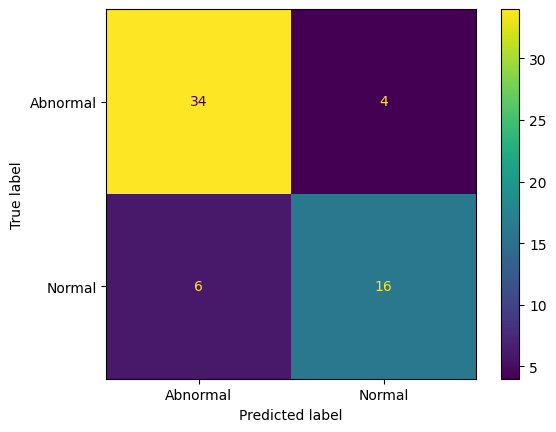

In [171]:
evaluateModel(model, X_test, y_test)

#The best of the best

In [191]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (512, 512, 512), activation="tanh", max_iter=1000)
model.fit(X_train, y_train);


score = 0.80

classification report:
              precision    recall  f1-score   support

    Abnormal       0.78      0.95      0.86        38
      Normal       0.86      0.55      0.67        22

    accuracy                           0.80        60
   macro avg       0.82      0.75      0.76        60
weighted avg       0.81      0.80      0.79        60

confusion matrix:


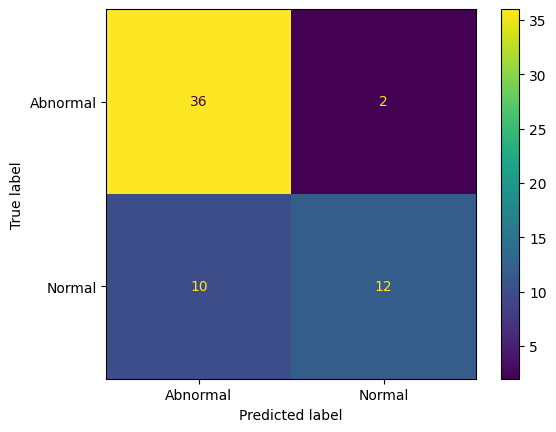

In [192]:
evaluateModel(model, X_test, y_test)


score = 0.83

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.87      0.87        38
      Normal       0.77      0.77      0.77        22

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60

confusion matrix:


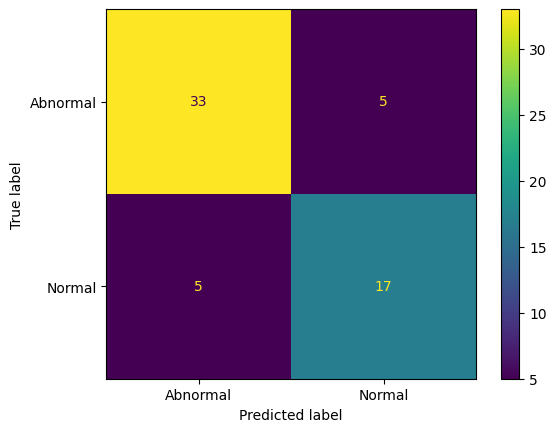

In [193]:
model = MLPClassifier(verbose=False, random_state=42, max_iter=1000)
model.fit(X_train, y_train);
evaluateModel(model, X_test, y_test)